커널 SVM 실습

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

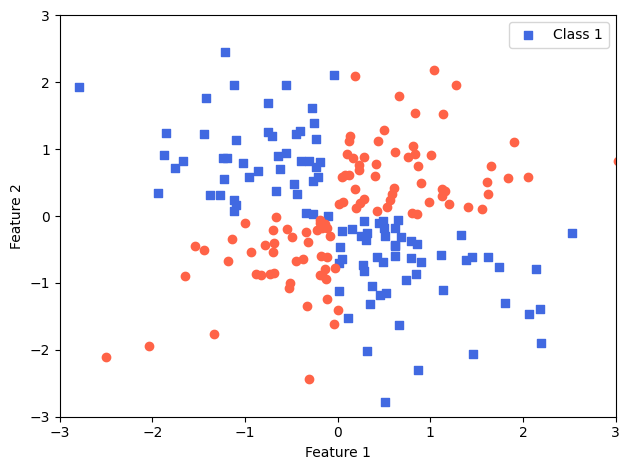

In [6]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[: ,0] > 0,
                       X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1,0)
plt.scatter(X_xor[y_xor == 1,0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker ='s',
            label = 'Class 1')
plt.scatter(X_xor[y_xor == 0,0],
            X_xor[y_xor == 0,1],
            c='tomato' , marker ='o')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc ='best')
plt.tight_layout()
plt.show()

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [9]:
def plot_decision_regions(X,y,classifier, test_idx =None, resolution =0.02):
    #  마커와 컬러맵을 설정
    markers = ('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #  결정 경계 그리기
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c= colors[idx],
                    marker = markers[idx],
                    label = f'Class {cl}',
                    edgecolor = 'black')
        #  테스트 샘플을 부각하여 그리기
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:,0], X_test[:,1],
                        c='none',edgecolor= 'black', alpha = 1.0,
                        linewidths=1, marker ='o', s=100, label='Test set')

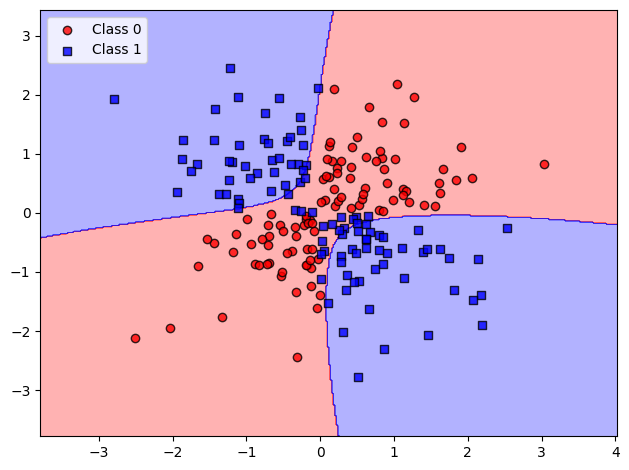

In [10]:
svm = SVC(kernel ='rbf', random_state =1, gamma = 0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier =svm)
plt.legend(loc ='upper left')
plt.tight_layout()
plt.show()

iris data

In [11]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X=iris.data[:,[2,3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1, stratify = y)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [17]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state =1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [18]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수 : %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수 : 1


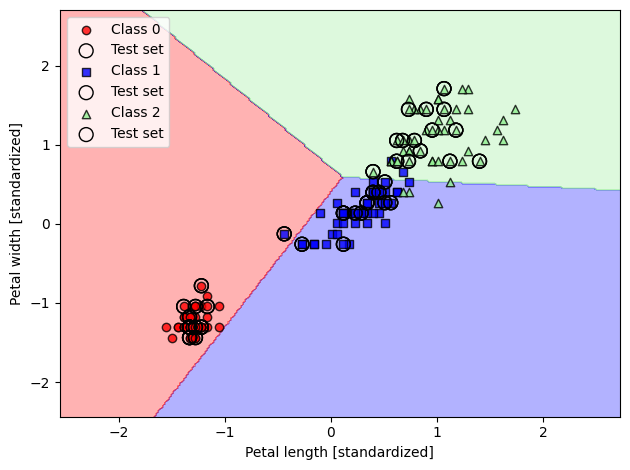

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X =X_combined_std, y=y_combined, classifier = ppn, test_idx = range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

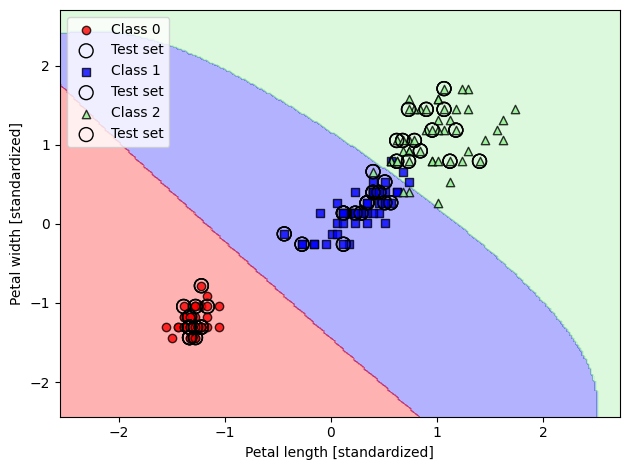

In [22]:
svm  = SVC(kernel ='rbf', random_state =1, gamma = 0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx= range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

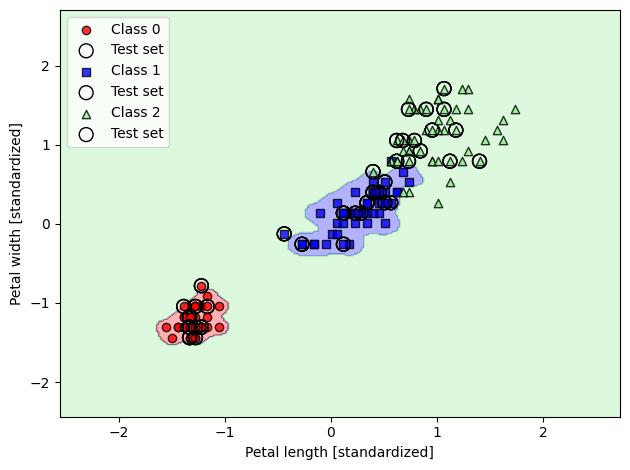

In [23]:
svm = SVC(kernel ='rbf', random_state =1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier =svm, test_idx = range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()